<a href="https://colab.research.google.com/github/Classymotion/Smilegate/blob/main/MCMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Theta mean value: 0.9167507853883581


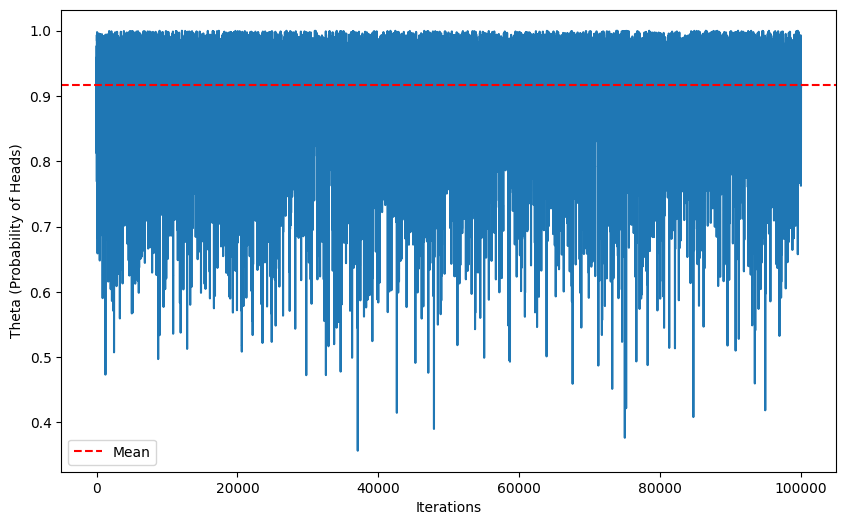

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def likelihood(theta, data):
    # 동전 던지기의 likelihood 함수
    # theta: 동전이 앞면(1)이 나올 확률
    # data: 동전 던지기 결과 (앞면: 1, 뒷면: 0)로 이루어진 배열
    num_heads = np.sum(data)
    num_tails = len(data) - num_heads
    return theta**num_heads * (1-theta)**num_tails

def prior(theta):
    # 동전 던지기의 사전 분포(prior) 함수
    # theta: 동전이 앞면(1)이 나올 확률
    return 1  # 비율이 일정한 균등 분포 사용

def mcmc_coin_toss(data, iterations):
    chain = []
    theta = np.random.uniform()  # 초기값 설정

    for _ in range(iterations):
        new_theta = np.random.uniform()  # 새로운 theta 값 생성

        likelihood_ratio = likelihood(new_theta, data) / likelihood(theta, data)
        prior_ratio = prior(new_theta) / prior(theta)
        acceptance_ratio = min(1, likelihood_ratio * prior_ratio)

        if np.random.uniform() < acceptance_ratio:
            theta = new_theta

        chain.append(theta)

    return np.array(chain)

# 동전 던지기 데이터 생성 (10번 던진 결과)
coin_toss_data = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# MCMC 실행
iterations = 100000
chain = mcmc_coin_toss(coin_toss_data, iterations)

# MCMC 실행 후 chain 생성
theta_mean_value = np.mean(chain)
print("Theta mean value:", theta_mean_value)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(chain)
plt.axhline(np.mean(chain), color='red', linestyle='--', label='Mean')
plt.xlabel('Iterations')
plt.ylabel('Theta (Probability of Heads)')
plt.legend()
plt.show()


